<a href="https://colab.research.google.com/github/ahmadalmasri270/project2-2/blob/main/E_Commerce2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E-Commerce Shipping Data

#About  
Name: Ahmad Almasi

Date: 12/3/2022



##Data source:
https://www.kaggle.com/datasets/prachi13/customer-analytics

###About Goal

Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

###About  Target 
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.
###Target

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

#Load and clean data

In [4]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler , OneHotEncoder,  \
OrdinalEncoder


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/E-com.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
ml_df = df
ml_df.shape

(10999, 12)

In [8]:
ml_df.duplicated().sum()

0

In [9]:
# Drope the Uniqe ID
ml_df.drop(['ID'], axis=1, inplace=True)

In [10]:
ml_df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
ml_df.describe(include = 'all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [12]:
# select only object columns
categoricals = ml_df.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64 

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64 

Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64 

Gender
F    5545
M    5454
Name: Gender, dtype: int64 



###In all the data set we are using in this project we have:

1.   0 missing value
2.   0 Douplicat 
3.   0 wrong categorical values


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

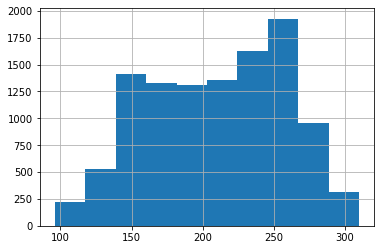

In [14]:
df['Cost_of_the_Product'].hist();

it showing that mast of the cost of the product between 150 $ and 250 $

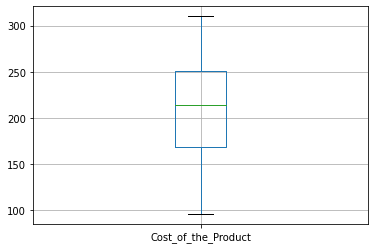

In [15]:
df.boxplot('Cost_of_the_Product');

the sampel was took its a 

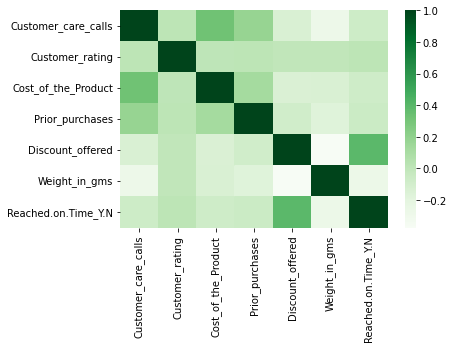

In [16]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap="Greens")

It has the highest correlation.

In [17]:
rate_eff_time = df.groupby(['Customer_rating'])['Reached.on.Time_Y.N'].value_counts()
rate_eff_time

Customer_rating  Reached.on.Time_Y.N
1                1                      1313
                 0                       922
2                1                      1273
                 0                       892
3                1                      1357
                 0                       882
4                1                      1303
                 0                       886
5                1                      1317
                 0                       854
Name: Reached.on.Time_Y.N, dtype: int64

Customer rating didn't affect the arrival time of the product on time

In [18]:
Cost_gen = df.groupby('Gender')['Cost_of_the_Product'].mean()
Cost_gen

Gender
F    209.255005
M    211.154382
Name: Cost_of_the_Product, dtype: float64

We can tell that Mals by or expensive things than female



In [19]:
Cost_imp = df.groupby('Product_importance')['Cost_of_the_Product'].mean()
Cost_imp

Product_importance
high      203.871308
low       212.059845
medium    209.382415
Name: Cost_of_the_Product, dtype: float64

In [20]:
imp_level = list(Cost_imp.index)
imp_level

['high', 'low', 'medium']

Text(0.5, 1.0, 'Average Cost by importance Level')

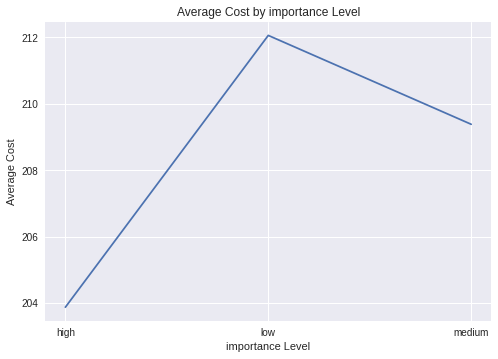

In [21]:
plt.style.use('seaborn')
plt.plot(imp_level, Cost_imp);
x = imp_level
my_xticks = ['high', 'low', 'medium']
plt.xticks(x, my_xticks)
plt.xlabel('importance Level')
plt.ylabel('Average Cost');
plt.title('Average Cost by importance Level')

We can see that the importance of the product does not affect the cost 

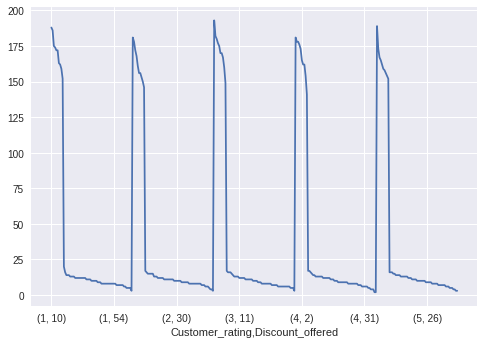

In [22]:
paybycur = df.groupby(['Customer_rating'])['Discount_offered'].value_counts()
paybycur.plot()

#Build the Models

##K-Nearest Neighbors

In [23]:
##Import Libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [24]:
##Arrange Data into a Features Matrix and Target Reached.on.Time.
X = ml_df.drop(columns='Reached.on.Time_Y.N')
y = ml_df['Reached.on.Time_Y.N']

In [25]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [26]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# instantiate transformers
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

# create preprocessing pipeline
base_preprocess = make_column_transformer((ohe, cat_cols), (scaler, num_cols))


In [27]:
#Base Model
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(base_preprocess, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c757610>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c7572e0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [43]:
%%time
from sklearn.utils.multiclass import check_classification_targets
#predict 
y_pred = knn_pipe.predict(X_test)

#Summarize Results
acc_score = knn_pipe.score(X_test, y_test)
acc_score
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))

Training accuracy: 0.7730634016244393
Testing accuracy: 0.6236363636363637
CPU times: user 4.18 s, sys: 536 ms, total: 4.71 s
Wall time: 7.75 s


##PCA K-Nearest Neighbors

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=.95)

In [31]:
#Base Model
knn = KNeighborsClassifier()
knn_pca_pipe = make_pipeline(base_preprocess,pca, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c757610>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c7572e0>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [47]:
%%time
#predict 
y_pred = knn_pca_pipe.predict(X_test)

#Summarize Results

print('Training accuracy:', knn_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe.score(X_test, y_test))

Training accuracy: 0.7690629167171779
Testing accuracy: 0.632
CPU times: user 1.69 s, sys: 342 ms, total: 2.03 s
Wall time: 1.7 s


As we can see after we apped .95 pca have better performance than without with 0.06 s and 0.01 in soccer


##Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(base_preprocess, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c757610>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c7572e0>)])),
                ('logisticregression', LogisticRegression())])

In [37]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.6387440901927507
Testing accuracy: 0.644


###Hyperparameters testing for Logistic Regression L1

{0.0001: 0.4,
 0.001: 0.6258181818181818,
 0.01: 0.645090909090909,
 0.1: 0.6414545454545455,
 1: 0.6425454545454545,
 10: 0.6425454545454545,
 100: 0.6425454545454545,
 1000: 0.6421818181818182}

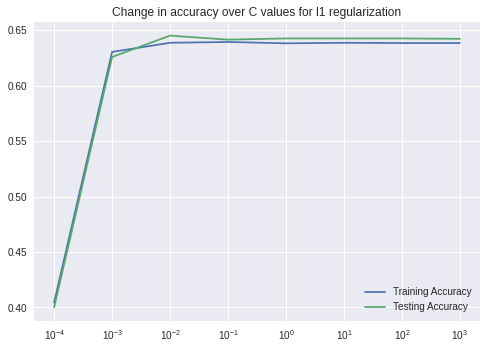

In [44]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg_pipe = make_pipeline(base_preprocess, log_reg)
  logreg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

##PCA Logistic Regression

In [45]:
#Base Model

log_pca_pipe = make_pipeline(base_preprocess,pca, logreg)
log_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c757610>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1e5c7572e0>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [46]:
%%time
#predict 
y_pred = log_pca_pipe.predict(X_test)

#Summarize Results
print('Training accuracy:', log_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', log_pca_pipe.score(X_test, y_test))

Training accuracy: 0.6404412656079524
Testing accuracy: 0.6407272727272727
CPU times: user 59.7 ms, sys: 54.7 ms, total: 114 ms
Wall time: 69.3 ms


###Hyperparameters testing for Logistic Regression with PCA and L2

{0.0001: 0.6632727272727272,
 0.001: 0.652,
 0.01: 0.6429090909090909,
 0.1: 0.6378181818181818,
 1: 0.64,
 10: 0.641090909090909,
 100: 0.6414545454545455,
 1000: 0.6414545454545455}

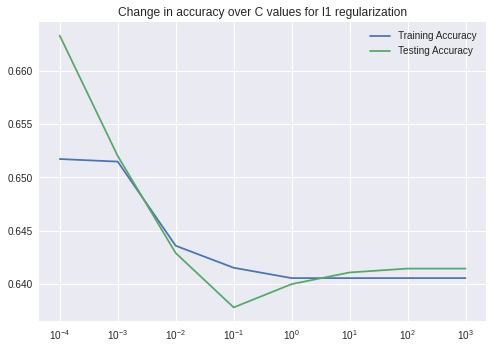

In [49]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_pca_pipe = make_pipeline(base_preprocess,pca, log_reg)
  log_pca_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_pca_pipe.score(X_train, y_train))
  test_scores.append(log_pca_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}